# Módulo 7. Modelos secuenciales 

¡Bienvenidos al séptimo módulo! Ya sabemos lo que son las redes neuronales, las redes convolucionales y cómo optimizar sus parámetros al máximo usando diferentes métodos, desde fuerza bruta hasta algoritmos genéticos. Así que en este módulo vamos a trabajar con arquitecturas de red totalmente diferentes, los **modelos secuenciales**.

En este módulo estudiaremos lo siguiente:

1. **Introducción**

2. **Redes recurrentes**

3. **Long Short-Term Memory (LSTM) networks**

4. **Ejemplos de aplicación**



## **1. Introducción**

Los modelos de secuencias (en inglés sequence models) son las técnicas utilizadas cuando el orden y la secuencia de los datos aportan mucho valor predictivo. 

**¿A qué nos referimos con secuencia?**

Una secuencia es una serie de elementos que se suceden unos a otros y guardan relación entre sí.

Voy a transcribirlo a un ejemplo fácil de asimilar. Cuando alguien nos pregunta el abecedario sabemos responder rápidamente sin dudarlo. Sin embargo, cuando tenemos que empezar el abecedario por una letra aleatoria nos cuesta un poco más, y si tenemos que decirlo de atrás para delante ya ni te cuento. Esto se debe a que tenemos metido en la cabeza el abecedario como una secuencia de letras y lo tenemos memorizado así. Esto es porque tanto las letras que preceden como las posteriores nos aportan mucha información para saber cuál toca.



Y, **¿Por qué no podemos utilizar modelos tradicionales o redes neuronales normales?**

Las redes neuronales estándar (NN a partir de ahora) presentan una serie de debilidades a la hora de afrontar este tipo de problemas:

 
*   Las NN están diseñadas para tener siempre el mismo tamaño de input y de output siempre. Sin embargo, en los problemas secuenciales, los inputs y los outputs pueden tener tamaños muy diferentes dependiendo de la observación. Por ejemplo, a la hora de traducir, cuando queremos traducir tres palabras tenemos un input y output mucho más pequeños que cuando queremos traducir un párrafo.
*  Las NN no comparten características entre las diferentes posiciones. Es decir, las NN asumen que cada input (y output) es independiente uno del otro, es decir, **no tienen ningún tipo de memoria**.


Vamos a ver como actúan las redes neuronales y su diferencia con las secuenciales siguiendo un ejemplo: **el del perfecto compañero de piso**. 

Imagináos que vivimos en un piso y que nuestro compañero de piso es estupendo, porque cada día cocina una cosa distinta según el tiempo que hace, soleado o lluvioso.

<img src="https://image.ibb.co/gSmT3J/nnintro_perfect_roomate.png" alt="nnintro_perfect_roomate" border="0" height="200">

<img src="https://image.ibb.co/nCSCVy/nnintro_perfect_roomate_weather.png" alt="nnintro_perfect_roomate_weather" border="0" height="200">

Si hace sol, tarta de manzana, si llueve, hamburguesa. La forma de codificar las comidas y el tiempo es la siguiente:

<img src="https://image.ibb.co/h32Pcd/nnintro_perfect_roomate_vectors.png" alt="nnintro_perfect_roomate_vectors" border="0" height="200">

Y esto es lo que hace nuestra red neuronal:

<img src="https://image.ibb.co/exmZtJ/nnintro_example_gif.gif" alt="nnintro_example_gif" border="0" height="200">

Acordaos que lo que aprenden las redes neuronales son unos pesos que pueden expresarse como una matriz. Aquí tenemos la nuestra:

* Si el día es soleado

<img src="https://image.ibb.co/d98fHd/nnintro_perfect_roomate_applepie.png" alt="nnintro_perfect_roomate_applepie" border="0" height="150">

* Si el día está nublado

<img src="https://image.ibb.co/n2JQiJ/nnintro_perfect_roomate_burguer.png" alt="nnintro_perfect_roomate_burguer" border="0" height="150">

Y nuestra matriz de pesos vista en forma de grafo:

<img src="https://image.ibb.co/m9LD3J/nnintro_perfect_roomate_matrix_graph.png" alt="nnintro_perfect_roomate_matrix_graph" border="0" height="200">


Vale, hasta aquí nada nuevo, ¿verdad? Pues vamos a ver qué es lo que añaden las arquitectura más común basada en modelos secuenciales, las **redes recurrentes**, en inglés Recurrent neural networks (RNN).

## **2. Redes recurrentes**

Pongamos que ahora nuestro querido compañero de piso no solamente basa la decisión de qué cocina en el tiempo, si no que ahora simplemente se fija en lo que cocinó ayer.

<img src="https://image.ibb.co/fVD3nd/rnnintro_perfect_roomate_food_cycle.png" alt="rnnintro_perfect_roomate_food_cycle" border="0" height="75">

Pues la red encargada de conseguir predecir lo que cocinará vuestro querido *roommate* mañana en función de lo que cocinó hoy es una:

<img src="https://image.ibb.co/c0GpSd/rnnintro_perfect_roomate_food_cycle_gif.gif" alt="rnnintro_perfect_roomate_food_cycle_gif" border="0" height="200">

Que se puede expresar como la matriz que podéis ver a continuación, y funciona así:

<img src="https://image.ibb.co/k0jOLy/nnintro_rnn_gif.gif" alt="nnintro_rnn_gif" border="0" height="250">

Que en forma de grafo, se puede expresar así:

<img src="https://image.ibb.co/fsTHfy/nnintro_rnn_graph_gif.gif" alt="nnintro_rnn_graph_gif" border="0" height="250">

Así que realmente, lo que tenemos al final es esto:

<img src="https://image.ibb.co/iL2ztJ/nnintro_rnn_graph.png" alt="nnintro_rnn_graph" border="0" height="200">

Una vez que se entiende en funcionamiento básico de una red recurrente, ¡vamos a complicarlo un poco más! Imagináos ahora que vuestro compañero decide lo que cocina en función de lo que cocinó ayer y del tiempo que hace. En concreto, si sale el día soleado, se pasa el día en la terracita con una buena birra en la mano, con lo cual no cocina, así que comemos lo mismo de ayer. Pero si sale lluvioso, se queda en casa y si que cocina. Sería algo así:

<img src="https://image.ibb.co/bUJ3nd/rnn_food_weather.png" alt="rnn_food_weather" border="0" height="150">

Con lo que tenemos una parte que nos modela lo que nos tocaría comer en función de lo que comimos ayer:

<img src="https://image.ibb.co/gL77DJ/nnintro_rnn_food_weather_gif.gif" alt="nnintro_rnn_food_weather_gif" border="0" height="250">

Y otra que nos dice si nos cocinan o si se va al bar:

<img src="https://image.ibb.co/jC6g7d/rnn_food_weather_gif.gif" alt="rnn_food_weather_gif" border="0" height="250">

Por lo que al final, tenemos una combinación de las dos:

<img src="https://image.ibb.co/cdcA0y/rnn_food_weather_matrices.png" alt="rnn_food_weather_matrices" border="0" height="250">

Y las operaciones Add y Merge son las siguientes:

<img src="https://image.ibb.co/ciutnd/rnn_food_weather_add.png" alt="rnn_food_weather_add" border="0" height="200">

<img src="https://image.ibb.co/fnKhfy/rnn_food_weather_merge.png" alt="rnn_food_weather_merge" border="0" height="200">


Y aquí podéis verla en función de grafo:

<img src="https://image.ibb.co/j258ud/rnn_graph.png" alt="rnn_graph" border="0" width="600">

¡Y así es como funcionan!


Todo esto está sacado de este video en inglés que os recomiendo encarecidamente que veais tantas veces como sea necesario para asimilar y asentar lo que os acabo de explicar: https://www.youtube.com/watch?v=UNmqTiOnRfg


### ¿Y para qué se usan las RNN?

Pues existen varios tipos:

<img src="https://image.ibb.co/cRTptJ/rnn_types.png" alt="rnn_types" border="0">

Como hemos comentado, son muy buenas sobretodo cuando nuestros datos son secuenciales:

* Predicción de acciones en bolsa
 * Los valores de una acción dependen en gran medida de los valores que tenía anteriormente
* Generación de secuencias
 * Siempre que nuestros datos sean secuencias y un dato en un instante $t$ dependa del dato en el instante $t-1$
* Generación de texto
 * Por ejemplo, cuando el movil te sugiere palabras. Se fija en la ultima palabra que has escrito, y en las letras que estás escribiendo en ese momento para sugerirte las próximas letras o incluso palabras
* Reconocimiento de voz
 * En este caso tenemos la anterior palabra reconocida, y el audio que nos llega en ese momento
 

## **3. Long Short-Term Memory networks**

Ahora que ya sabéis cómo funcionan las redes recurrentes, vamos a ver las más famosas, las LSTM. Esta es la estructura de una RNN:

<img src="https://image.ibb.co/mUUR7d/rnn_1.png" alt="rnn_1" border="0">

Pero antes, ¿por qué son las LSTM las más usadas? 

Resulta que las RNN convencionales tienen problemas de memoria. Paradójico, ¿no creéis? Que las redes especialemente diseñadas para recordar sean incapaces de recordar a largo plazo. ¿Y por qué esto es un problema?

Pues volviendo al problema de nuestro roommate, para este ejemplo solo necesitamos conocer lo que comimos ayer, así que no pasaría nada. 

<img src="https://image.ibb.co/n6kNfy/rnn_2.png" alt="rnn_2" border="0">

Pero imagináos que en vez de un menú con 3 comidas, tuviese 60 platos.

<img src="https://image.ibb.co/mCWv0y/rnn_3.png" alt="rnn_3" border="0">

Las RNN convencionales no serían capaces de recordar cosas que pasaron hace mucho tiempo. Sin embargo, las LSTM sí!


Echémosle un ojo a la arquitectura de las RNN y de las LSTM:

### RNN

<img src="https://image.ibb.co/mkAind/rnn_rnn_arch.png" alt="rnn_rnn_arch" border="0">

### LSTM

<img src="https://image.ibb.co/hw4LYJ/rnn_lstm_arch.png" alt="rnn_lstm_arch" border="0">

Resulta que las RNN son una cadena de módulos repetidos, en los que cada módulo puede ser tan simple como una tanh de función de activación. Las LSTM tienen esta estructura de cadena de módulos, pero esta vez el módulo es un poco más complejo. Cada módulo, en vez de tener una simple función de activación, existen 4 neuronas que interactúan entre ellas.

Vamos a tratar de entenderlo, pero primero, os explico la nomenclatura:

<img src="https://image.ibb.co/na6W7d/rnn_arch_nomenclature.png" alt="rnn_arch_nomenclature" border="0" height="100">

En los diagramas de arriba, por cada línea viaja un vector, desde la salida de un nodo hasta las entradas de otros. Los círculos rosas indican operaciones elemento a elemento, como sumas de vectores, mientras que las cajas amarillas son capas neuronales que se aprenden al entrenar. Las líneas que se unen indican concatenar, y las que se separan, que el mismo contenido de la linea viaja a dos destinos distintos.

### La idea clave de las LSTMs

La clave es el estado de la celda, que está indicado en el diagrama como la línea que viaja por la parte de arriba: 

<img src="https://image.ibb.co/hvJYLy/rnn_arch_cell_status.png" alt="rnn_arch_cell_status" border="0">

El estado de la celda es como una especie de cinta transportadora que viaja a lo largo de toda la arquitectura de la red con muy pocas interacciones (y las pocaas que tiene son lineales): lo cual implica que la información simplemente fluye sin ser modificada.

La parte ingeniosa es que las capas de la LSTM pueden (o no) aportar información a esta cinta transportadora, y esa decisión la toman las "puertas":

<img src="https://image.ibb.co/kjHSfy/rnn_arch_gate.png" alt="rnn_arch_gate" border="0">

Las puertas no son otra cosa que una forma de regular cuidadosamente la información que llega a la cinta transportadora. Están compuestas de una red neuronal con una activación de tipo sigmoide y una multiplicación elemento a elemento.

Así, la capa sigmoide da como salida un número entre 0 y uno, que implica cómo de importante es esa información para dejarla pasr a la cinta transportadora. Un 0 significa que no me importa, y un uno significa que es muy importante.

Como podéis ver en el diagrama, una LSTM tiene 3 puertas de este tipo, para proteger y controlar la cina transportadora. Podemos entender rápidamente su funcionamiento ayudándonos de este blog: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

Y este blog también es muy interesante, para vosotros, curiosos: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

**Visto esto, vamos a ver qué es lo que pueden hacer las Redes Recurrentes!**

APLICACIONES: https://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/





## **4. Ejemplos de aplicación**
### 4.1. Clasificación de imágenes con MNIST
Vamos a ver si podemos clasificar las imágenes del MNIST con una LSTM, y con qué precisión:

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import initializers
  
# Hyper parameters
batch_size = 128
nb_epoch = 10

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28
nb_classes = 10

# Parameters for LSTM network
nb_lstm_outputs = 30
nb_time_steps = img_rows
dim_input_vector = img_cols

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train original shape:', X_train.shape)
input_shape = (nb_time_steps, dim_input_vector)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11490434/11490434 [==============================] - 1s 0us/step
X_train original shape: (60000, 28, 28)
X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [2]:
# Construimos la LSTM
model = Sequential()
model.add(LSTM(nb_lstm_outputs, input_shape=input_shape))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                7080      
                                                                 
 dense (Dense)               (None, 10)                310       
                                                                 
Total params: 7,390
Trainable params: 7,390
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Entrenamos
history = model.fit(X_train, 
                    Y_train, 
                    epochs=nb_epoch, 
                    batch_size=batch_size, 
                    shuffle=True,
                    validation_data=(X_test, Y_test),
                    verbose=1)

Epoch 1/10
469/469 [==============================] - 11s 7ms/step - loss: 1.0605 - accuracy: 0.6723 - val_loss: 0.5293 - val_accuracy: 0.8446
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4004 - accuracy: 0.8827 - val_loss: 0.2975 - val_accuracy: 0.9141
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2681 - accuracy: 0.9222 - val_loss: 0.2277 - val_accuracy: 0.9352
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2140 - accuracy: 0.9375 - val_loss: 0.2087 - val_accuracy: 0.9375
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1801 - accuracy: 0.9481 - val_loss: 0.1826 - val_accuracy: 0.9474
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1586 - accuracy: 0.9538 - val_loss: 0.1625 - val_accuracy: 0.9541
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1409 - accuracy: 0.9587 - val_loss: 0.1391 - val_accuracy: 0.9603
Epoch

In [ ]:
# Evaluamos
evaluation = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

79/79 [==============================] - 0s 4ms/step - loss: 0.1268 - accuracy: 0.9631
Summary: Loss over the test dataset: 0.13, Accuracy: 0.96


In [ ]:
# Fuente: https://medium.com/the-artificial-impostor/notes-understanding-tensorflow-part-2-f7e5ece849f5

### 4.2. Predicción de letras consecutivas en el alfabeto

In [4]:
# Naive LSTM to learn one-char to one-char mapping (https://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/)
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# prepare the dataset of input to output pairs encoded as integers
seq_length = 1
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)

# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (len(dataX), seq_length, 1))
print(X.shape)

# normalize
X = X / float(len(alphabet))

# one hot encode the output variable
y = to_categorical(dataY)

# create and fit the model
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=1, verbose=2)

# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

# demonstrate some model predictions
for pattern in dataX:
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

A -> B
B -> C
C -> D
D -> E
E -> F
F -> G
G -> H
H -> I
I -> J
J -> K
K -> L
L -> M
M -> N
N -> O
O -> P
P -> Q
Q -> R
R -> S
S -> T
T -> U
U -> V
V -> W
W -> X
X -> Y
Y -> Z
(25, 1, 1)
Epoch 1/500
25/25 - 1s - loss: 3.2653 - accuracy: 0.0400 - 1s/epoch - 56ms/step
Epoch 2/500
25/25 - 0s - loss: 3.2572 - accuracy: 0.0400 - 69ms/epoch - 3ms/step
Epoch 3/500
25/25 - 0s - loss: 3.2540 - accuracy: 0.0400 - 68ms/epoch - 3ms/step
Epoch 4/500
25/25 - 0s - loss: 3.2508 - accuracy: 0.0400 - 80ms/epoch - 3ms/step
Epoch 5/500
25/25 - 0s - loss: 3.2478 - accuracy: 0.0400 - 66ms/epoch - 3ms/step
Epoch 6/500
25/25 - 0s - loss: 3.2447 - accuracy: 0.0400 - 65ms/epoch - 3ms/step
Epoch 7/500
25/25 - 0s - loss: 3.2411 - accuracy: 0.0000e+00 - 69ms/epoch - 3ms/step
Epoch 8/500
25/25 - 0s - loss: 3.2375 - accuracy: 0.0400 - 70ms/epoch - 3ms/step
Epoch 9/500
25/25 - 0s - loss: 3.2336 - accuracy: 0.0400 - 71ms/epoch - 3ms/step
Epoch 10/500
25/25 - 0s - loss: 3.2302 - accuracy: 0.0400 - 69ms/epoch - 3ms/step


### 4.3. Predicción de letras consecutivas en el alfabeto teniendo como input grupos de tres letras



In [8]:
# Naive LSTM to learn three-char window to one-char mapping (https://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/)
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
numpy.random.seed(7)

# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# prepare the dataset of input to output pairs encoded as integers
seq_length = 3
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)

# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (len(dataX), 1, seq_length))

# normalize
X = X / float(len(alphabet))

# one hot encode the output variable
y = to_categorical(dataY)

# create and fit the model
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X, y, epochs=500, batch_size=1, verbose=2)

# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

# demonstrate some model predictions
for pattern in dataX:
	x = numpy.reshape(pattern, (1, 1, len(pattern)))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

ABC -> D
BCD -> E
CDE -> F
DEF -> G
EFG -> H
FGH -> I
GHI -> J
HIJ -> K
IJK -> L
JKL -> M
KLM -> N
LMN -> O
MNO -> P
NOP -> Q
OPQ -> R
PQR -> S
QRS -> T
RST -> U
STU -> V
TUV -> W
UVW -> X
VWX -> Y
WXY -> Z
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 32)                4608      
                                                                 
 dense_5 (Dense)             (None, 26)                858       
                                                                 
Total params: 5,466
Trainable params: 5,466
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
23/23 - 1s - loss: 3.2683 - accuracy: 0.0435 - 1s/epoch - 60ms/step
Epoch 2/500
23/23 - 0s - loss: 3.2567 - accuracy: 0.0435 - 67ms/epoch - 3ms/step
Epoch 3/500
23/23 - 0s - loss: 3.2502 - accuracy: 0.0435 - 61ms/epoch - 3ms/step

Model Accuracy: 86.96%
['A', 'B', 'C'] -> D
['B', 'C', 'D'] -> E
['C', 'D', 'E'] -> F
['D', 'E', 'F'] -> G
['E', 'F', 'G'] -> H
['F', 'G', 'H'] -> I
['G', 'H', 'I'] -> J
['H', 'I', 'J'] -> K
['I', 'J', 'K'] -> L
['J', 'K', 'L'] -> M
['K', 'L', 'M'] -> N
['L', 'M', 'N'] -> O
['M', 'N', 'O'] -> P
['N', 'O', 'P'] -> Q
['O', 'P', 'Q'] -> R
['P', 'Q', 'R'] -> S
['Q', 'R', 'S'] -> T
['R', 'S', 'T'] -> U
['S', 'T', 'U'] -> V
['T', 'U', 'V'] -> Y
['U', 'V', 'W'] -> Z
['V', 'W', 'X'] -> Z
['W', 'X', 'Y'] -> Z


### 4.4. Ejemplos de Time Series prediction con LSTMs

Ejemplo 1. Vamos a tratar de predecir el número viajeros de una aerolinea.

--2022-05-08 11:05:36--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/airline/international-airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2334 (2.3K) [text/plain]
Saving to: ‘international-airline-passengers.csv’

international-airli 100%[===================>]   2.28K  --.-KB/s    in 0s      

2022-05-08 11:05:37 (20.5 MB/s) - ‘international-airline-passengers.csv’ saved [2334/2334]

Epoch 1/100
94/94 - 2s - loss: 0.0298 - 2s/epoch - 20ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0134 - 287ms/epoch - 3ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0101 - 283ms/epoch - 3ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0094 - 284ms/epoch - 3ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0084 - 289ms/epoch - 3ms/step
Epoch 

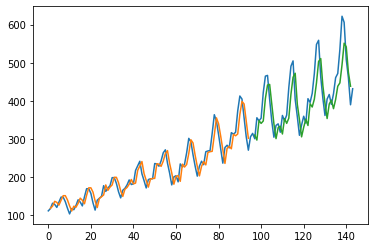

In [ ]:
# LSTM for international airline passengers problem with regression framing
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/airline/international-airline-passengers.csv

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



Ejemplo 2. Vamos a tratar de solucionar el problema del IMDB.

In [ ]:
# imdb problem
# https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
  
# LSTM for sequence classification in the IMDB dataset
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

17473536/17464789 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 13s 28ms/step - loss: 0.4799 - accuracy: 0.7721
Epoch 2/3
391/391 [==============================] - 11s 28ms/step - loss: 0.3129 - accuracy: 0.8742
Epoch 3/3
391/391 [=====================



Ejemplo 3.Vamos a tratar de predecir el número de ventas de un champú. 

Para ello, disponemos de un dataset en el que se incluyen las ventas de los últimos 3 años.

In [ ]:
!rm shampo*
!ls -la

rm: cannot remove 'shampo*': No such file or directory
total 16
drwxr-xr-x 1 root root 4096 May 17 13:39 .
drwxr-xr-x 1 root root 4096 May 30 16:55 ..
drwxr-xr-x 4 root root 4096 May 17 13:38 .config
drwxr-xr-x 1 root root 4096 May 17 13:39 sample_data


In [ ]:
!wget -O shampoo-sales.csv https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv
!ls -la

--2022-05-30 16:59:58--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519 [text/plain]
Saving to: ‘shampoo-sales.csv’

shampoo-sales.csv   100%[===================>]     519  --.-KB/s    in 0s      

2022-05-30 16:59:59 (30.6 MB/s) - ‘shampoo-sales.csv’ saved [519/519]

total 20
drwxr-xr-x 1 root root 4096 May 30 16:59 .
drwxr-xr-x 1 root root 4096 May 30 16:55 ..
drwxr-xr-x 4 root root 4096 May 17 13:38 .config
drwxr-xr-x 1 root root 4096 May 17 13:39 sample_data
-rw-r--r-- 1 root root  519 May 30 16:59 shampoo-sales.csv


In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
# load dataset
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print('Dataset cargado')

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
print('Datos transformados')

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
print('Datos transformados a supervisado')
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
print('Datos escalados')

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

Dataset cargado
Datos transformados
Datos transformados a supervisado
Datos escalados


array([[-0.76449394],
       [-0.05570725],
       [-0.5933274 ],
       [ 0.12383839],
       [-0.12929282],
       [ 0.14522555],
       [-0.38756084],
       [-0.08802918],
       [ 0.08634159],
       [ 0.66753256],
       [-0.9045472 ],
       [ 0.12833813],
       [-0.36704704],
       [ 0.3704361 ],
       [ 0.06332588],
       [-0.4253638 ],
       [ 0.08460811],
       [-0.47765523],
       [ 0.1985828 ],
       [-0.3942209 ],
       [-0.04227495],
       [-1.2053202 ],
       [ 0.17329416]], dtype=float32)

Month=1, Predicted=224.353322, Expected=339.700000
Month=2, Predicted=301.203857, Expected=440.400000
Month=3, Predicted=262.054968, Expected=315.900000
Month=4, Predicted=315.147788, Expected=439.300000
Month=5, Predicted=277.535365, Expected=401.300000
Month=6, Predicted=337.757961, Expected=437.400000
Month=7, Predicted=319.097165, Expected=575.500000
Month=8, Predicted=307.059853, Expected=407.600000
Month=9, Predicted=473.942404, Expected=682.000000
Month=10, Predicted=369.206767, Expected=475.300000
Month=11, Predicted=634.319309, Expected=581.300000
Month=12, Predicted=379.772408, Expected=646.900000
Test RMSE: 152.971


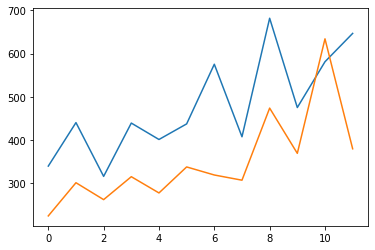

In [ ]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()

### 4.5. Ejemplo de generación de música

In [ ]:
!git clone https://github.com/Skuldur/Classical-Piano-Composer
!ls -la

Cloning into 'Classical-Piano-Composer'...
remote: Enumerating objects: 334, done.
remote: Total 334 (delta 0), reused 0 (delta 0), pack-reused 334
Receiving objects: 100% (334/334), 721.79 MiB | 26.63 MiB/s, done.
Resolving deltas: 100% (41/41), done.
total 20
drwxr-xr-x 1 root root 4096 May 30 19:08 .
drwxr-xr-x 1 root root 4096 May 30 19:02 ..
drwxr-xr-x 6 root root 4096 May 30 19:08 Classical-Piano-Composer
drwxr-xr-x 4 root root 4096 May 17 13:38 .config
drwxr-xr-x 1 root root 4096 May 17 13:39 sample_data


In [ ]:
# FUENTE: https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5

""" This module prepares midi file data and feeds it to the neural
    network for training """
import glob
import pickle
import numpy
from music21 import converter, instrument, note, chord, stream
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

def train_network():
    """ Train a Neural Network to generate music """
    notes = get_notes()

    # get amount of pitch names
    n_vocab = len(set(notes))

    network_input, network_output = prepare_sequences(notes, n_vocab)

    model = create_network(network_input, n_vocab)

    train(model, network_input, network_output)

def get_notes():
    """ Get all the notes and chords from the midi files in the ./midi_songs directory """
    notes = []

    for file in glob.glob("Classical-Piano-Composer/midi_songs/*.mid"):
        midi = converter.parse(file)

        print("Parsing %s" % file)

        notes_to_parse = None

        try: # file has instrument parts
            s2 = instrument.partitionByInstrument(midi)
            notes_to_parse = s2.parts[0].recurse() 
        except: # file has notes in a flat structure
            notes_to_parse = midi.flat.notes

        for element in notes_to_parse:
            if isinstance(element, note.Note):
                notes.append(str(element.pitch))
            elif isinstance(element, chord.Chord):
                notes.append('.'.join(str(n) for n in element.normalOrder))

    with open('Classical-Piano-Composer/data/notes', 'wb') as filepath:
        pickle.dump(notes, filepath)

    return notes

def prepare_sequences(notes, n_vocab):
    """ Prepare the sequences used by the Neural Network """
    sequence_length = 100

    # get all pitch names
    pitchnames = sorted(set(item for item in notes))

     # create a dictionary to map pitches to integers
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    network_input = []
    network_output = []

    # create input sequences and the corresponding outputs
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        sequence_out = notes[i + sequence_length]
        network_input.append([note_to_int[char] for char in sequence_in])
        network_output.append(note_to_int[sequence_out])

    n_patterns = len(network_input)

    # reshape the input into a format compatible with LSTM layers
    network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
    # normalize input
    network_input = network_input / float(n_vocab)

    network_output = to_categorical(network_output)

    return (network_input, network_output)

def create_network(network_input, n_vocab):
    """ create the structure of the neural network """
    model = Sequential()
    model.add(LSTM(
        512,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(0.3))
    model.add(LSTM(512, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(512))
    model.add(Dense(256))
    model.add(Dropout(0.3))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    return model

def train(model, network_input, network_output):
    """ train the neural network """
    filepath = "Classical-Piano-Composer/weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
    checkpoint = ModelCheckpoint(
        filepath,
        monitor='loss',
        verbose=0,
        save_best_only=True,
        mode='min'
    )
    callbacks_list = [checkpoint]

    model.fit(network_input, network_output, epochs=1, batch_size=64, callbacks=callbacks_list)

In [ ]:
train_network()

Parsing Classical-Piano-Composer/midi_songs/tpirtsd-piano.mid
Parsing Classical-Piano-Composer/midi_songs/0fithos.mid
Parsing Classical-Piano-Composer/midi_songs/Ff4-BattleLust.mid
Parsing Classical-Piano-Composer/midi_songs/Kingdom_Hearts_Dearly_Beloved.mid
Parsing Classical-Piano-Composer/midi_songs/ff7themep.mid
Parsing Classical-Piano-Composer/midi_songs/Zelda_Overworld.mid
Parsing Classical-Piano-Composer/midi_songs/gerudo.mid
Parsing Classical-Piano-Composer/midi_songs/bcm.mid
Parsing Classical-Piano-Composer/midi_songs/Oppressed.mid
Parsing Classical-Piano-Composer/midi_songs/8.mid
Parsing Classical-Piano-Composer/midi_songs/ultimafro.mid
Parsing Classical-Piano-Composer/midi_songs/Life_Stream.mid
Parsing Classical-Piano-Composer/midi_songs/sobf.mid
Parsing Classical-Piano-Composer/midi_songs/waltz_de_choco.mid
Parsing Classical-Piano-Composer/midi_songs/pkelite4.mid
Parsing Classical-Piano-Composer/midi_songs/dayafter.mid
Parsing Classical-Piano-Composer/midi_songs/Eternal_Harv

In [ ]:
!ls -la Classical-Piano-Composer/*.hdf5

-rw-r--r-- 1 root root 43837652 May 30 19:08 Classical-Piano-Composer/new_weights.hdf5
-rw-r--r-- 1 root root 43699036 May 30 19:08 Classical-Piano-Composer/weights.hdf5
-rw-r--r-- 1 root root 43860224 May 30 19:11 Classical-Piano-Composer/weights-improvement-01-4.7673-bigger.hdf5


In [ ]:
weights_path = 'Classical-Piano-Composer/weights-improvement-01-4.7673-bigger.hdf5'

In [ ]:
from tqdm import tqdm 

def generate():
    """ Generate a piano midi file """
    #load the notes used to train the model
    with open('Classical-Piano-Composer/data/notes', 'rb') as filepath:
        notes = pickle.load(filepath)

    # Get all pitch names
    pitchnames = sorted(set(item for item in notes))
    # Get all pitch names
    n_vocab = len(set(notes))

    network_input, normalized_input = prepare_sequences(notes, pitchnames, n_vocab)
    model = create_network(normalized_input, n_vocab)
    prediction_output = generate_notes(model, network_input, pitchnames, n_vocab)
    output_midi = create_midi(prediction_output)
    return output_midi
    
def prepare_sequences(notes, pitchnames, n_vocab):
    """ Prepare the sequences used by the Neural Network """
    # map between notes and integers and back
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    sequence_length = 100
    network_input = []
    output = []
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        sequence_out = notes[i + sequence_length]
        network_input.append([note_to_int[char] for char in sequence_in])
        output.append(note_to_int[sequence_out])

    n_patterns = len(network_input)

    # reshape the input into a format compatible with LSTM layers
    normalized_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
    # normalize input
    normalized_input = normalized_input / float(n_vocab)

    return (network_input, normalized_input)
  
def create_network(network_input, n_vocab):
    """ create the structure of the neural network """
    model = Sequential()
    model.add(LSTM(
        512,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(0.3))
    model.add(LSTM(512, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(512))
    model.add(Dense(256))
    model.add(Dropout(0.3))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    # Load the weights to each node
    model.load_weights(weights_path)

    return model

def generate_notes(model, network_input, pitchnames, n_vocab):
    """ Generate notes from the neural network based on a sequence of notes """
    # pick a random sequence from the input as a starting point for the prediction
    start = numpy.random.randint(0, len(network_input)-1)

    int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

    pattern = network_input[start]
    prediction_output = []

    # generate 500 notes
    for note_index in tqdm(range(500)):
        prediction_input = numpy.reshape(pattern, (1, len(pattern), 1))
        prediction_input = prediction_input / float(n_vocab)

        prediction = model.predict(prediction_input, verbose=0)

        index = numpy.argmax(prediction)
        result = int_to_note[index]
        prediction_output.append(result)

        pattern.append(index)
        pattern = pattern[1:len(pattern)]

    return prediction_output

def create_midi(prediction_output):
    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 0.5

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp='Classical-Piano-Composer/test_output.mid')
    
    return output_notes

In [ ]:
output_notes = generate()

100%|██████████| 500/500 [00:26<00:00, 19.04it/s]


In [ ]:
output_notes

[<music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.N

In [ ]:
!ls -la Classical-Piano-Composer/

total 128380
drwxr-xr-x 6 root root     4096 May 30 19:13 .
drwxr-xr-x 1 root root     4096 May 30 19:08 ..
drwxr-xr-x 2 root root     4096 May 30 19:08 data
drwxr-xr-x 8 root root     4096 May 30 19:08 .git
-rw-r--r-- 1 root root       65 May 30 19:08 .gitattributes
-rw-r--r-- 1 root root     1087 May 30 19:08 LICENSE
-rw-r--r-- 1 root root     4029 May 30 19:08 lstm.py
drwxr-xr-x 2 root root     4096 May 30 19:08 midi_songs
-rw-r--r-- 1 root root 43837652 May 30 19:08 new_weights.hdf5
-rw-r--r-- 1 root root     4809 May 30 19:08 predict.py
drwxr-xr-x 2 root root     4096 May 30 19:08 __pycache__
-rw-r--r-- 1 root root      879 May 30 19:08 README.md
-rw-r--r-- 1 root root     4536 May 30 19:13 test_output.mid
-rw-r--r-- 1 root root 43699036 May 30 19:08 weights.hdf5
-rw-r--r-- 1 root root 43860224 May 30 19:11 weights-improvement-01-4.7673-bigger.hdf5


In [ ]:
from google.colab import files
files.download('Classical-Piano-Composer/test_output.mid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Para escuchar MIDIs creados con una red entrenada: https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5

Y aquí tenéis algunos otros ejemplos muy interesantes:

In [ ]:
# Ejemplo de trading
# https://github.com/happynoom/DeepTrade_keras

# Ejemplo de cómo generar el 6o libro de GOT
# https://github.com/zackthoutt/got-book-6

# Ejemplo de detección de anuncios en videos
# https://github.com/harvitronix/continuous-online-video-classification-blog

** BONUS **

Transformer: https://towardsdatascience.com/transformers-141e32e69591 

Visual transformers: https://theaisummer.com/vision-transformer/